In [1]:
import pybamm

In [2]:
model = pybamm.lithium_ion.SPM({"SEI": "ec reaction limited"})

In [3]:
parameter_values = pybamm.ParameterValues("Mohtat2020")
parameter_values.update({"SEI kinetic rate constant [m.s-1]": 1e-14})

In [4]:
# define experiments

cycles = 10
cccv_experiment = pybamm.Experiment([
    ("Charge at 1C until 4.2V", 
     "Hold at 4.2V until C/50",
     "Discharge at 1C until 3V",
     "Rest for 1 hour",
    )
] * cycles)
charge_experiment = pybamm.Experiment([
    ("Charge at 1C until 4.2V", 
     "Hold at 4.2V until C/50",
    )
])
# is this right?
rpt_experiment = pybamm.Experiment([
    ("Discharge at C/3 until 3V",)
])

In [5]:
# simulate cccv
sim = pybamm.Simulation(model, experiment=cccv_experiment, parameter_values=parameter_values)
cccv_sol = sim.solve()

In [6]:
pybamm.dynamic_plot(cccv_sol, ["Current [A]", "Voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=31.01670497859273, step=0.3101670497859273),…

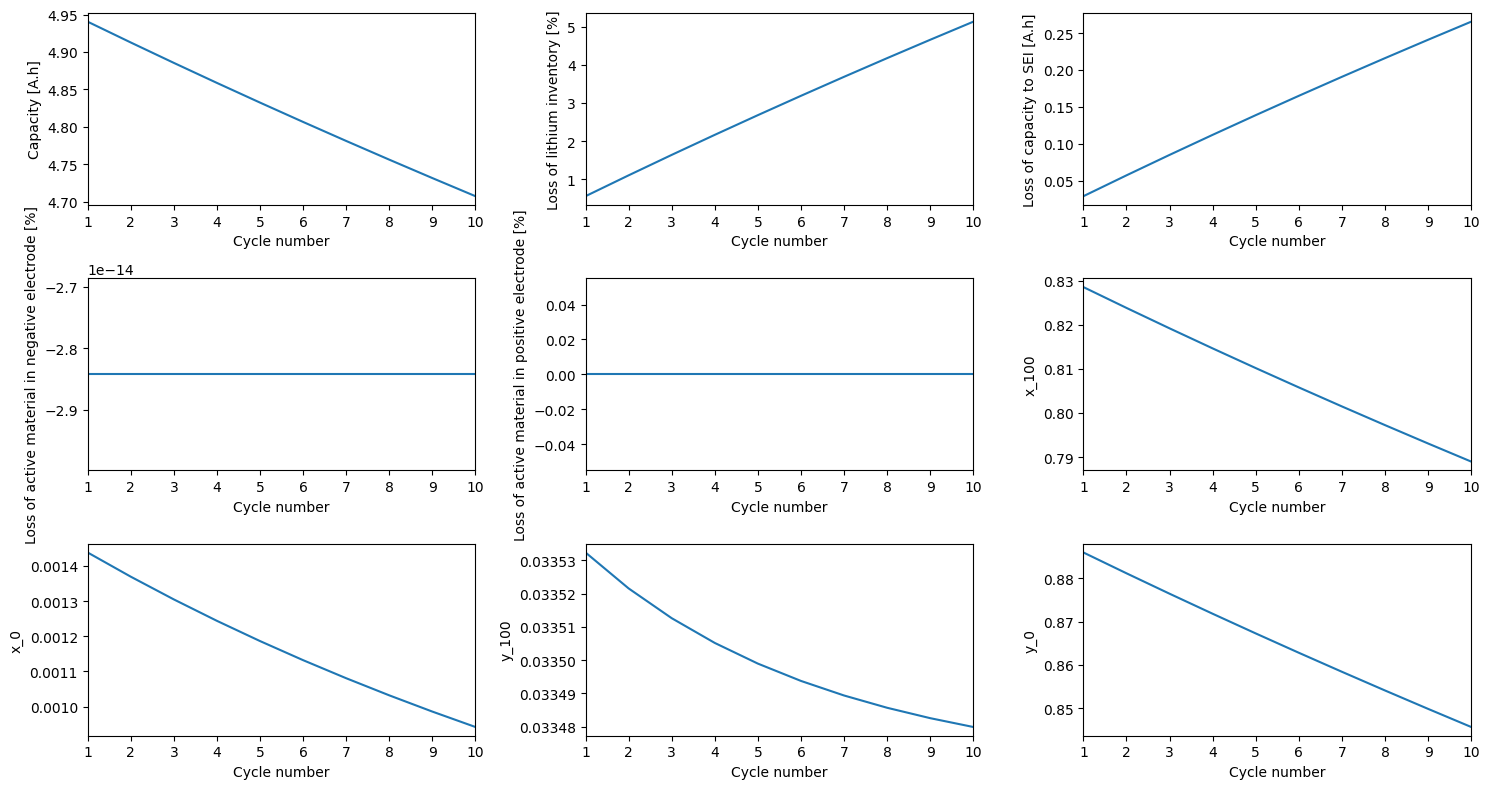

In [7]:
pybamm.plot_summary_variables(cccv_sol);

In [8]:
# option 1, do the charge then the RPT
sim = pybamm.Simulation(model, experiment=charge_experiment, parameter_values=parameter_values)
charge_sol = sim.solve(starting_solution=cccv_sol)
sim = pybamm.Simulation(model, experiment=rpt_experiment, parameter_values=parameter_values)
rpt_sol = sim.solve(starting_solution=charge_sol)

In [9]:
pybamm.dynamic_plot(rpt_sol.cycles[-1], ["Current [A]", "Voltage [V]"])

interactive(children=(FloatSlider(value=32.16021205096371, description='t', max=34.910964032167946, min=32.160…

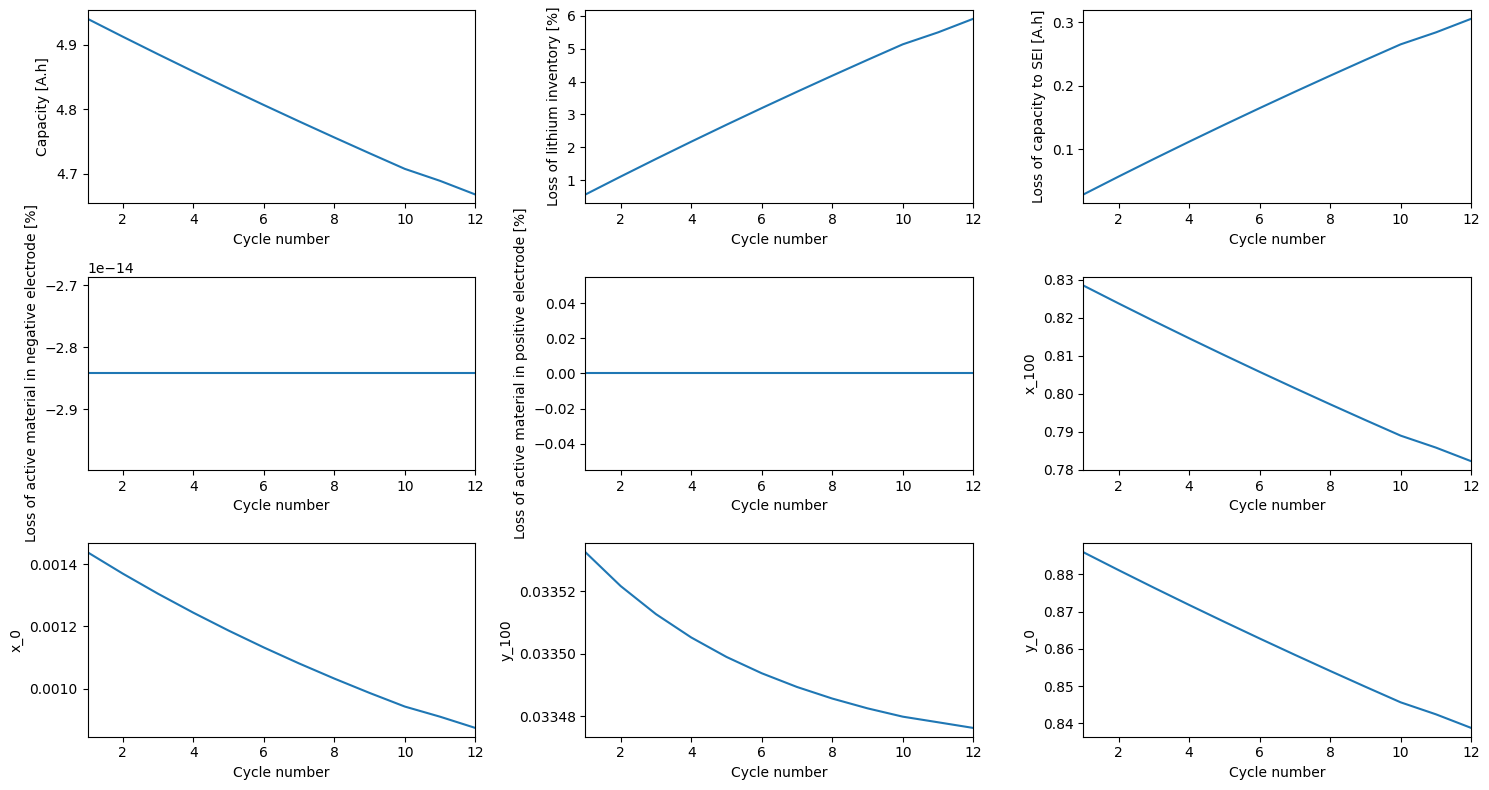

In [10]:
pybamm.plot_summary_variables(rpt_sol);

In [11]:
# option 2, set soc then do the RPT